In [1]:
!pip install pandas numpy scikit-learn nltk matplotlib


In [2]:
import pandas as pd               # For data handling
import numpy as np                # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation
import string                     # For removing punctuation
import nltk                       # For text preprocessing
from nltk.corpus import stopwords # For removing stopwords
import matplotlib.pyplot as plt   # For visualizing results


In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Full file path
file_path = r"C:\Users\Admin\Documents\Spam_Detection_Project\sms+spam+collection\spam.csv"

# Load the dataset as TSV (tab-separated values)
data = pd.read_csv(file_path, sep='\t', header=None, encoding='latin-1')

# Rename columns for clarity
data.columns = ['label', 'message']

# Convert labels to binary (spam = 1, ham = 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Display the first few rows
data.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
def preprocess_text(text):
    # Lowercase all text
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize (split into individual words)
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Join the cleaned words back into a string
    return ' '.join(words)

# Apply preprocessing
data['message'] = data['message'].apply(preprocess_text)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.25, random_state=42
)


In [7]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)


In [8]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)


In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97

Confusion Matrix:
 [[1207    0]
 [  44  142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1207
           1       1.00      0.76      0.87       186

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393



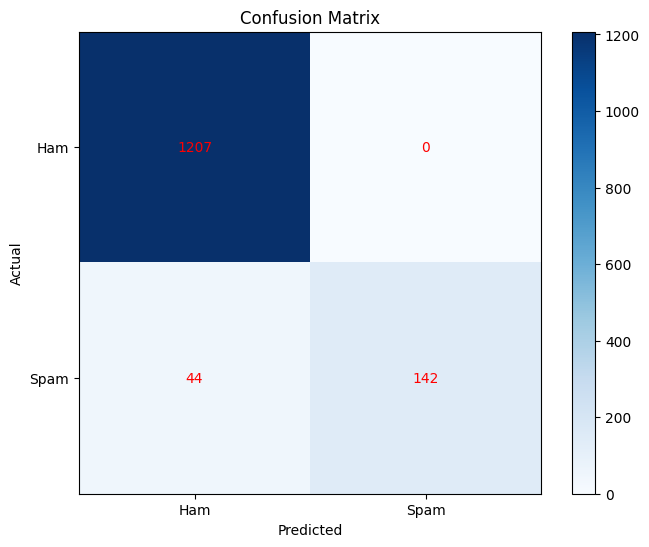

In [10]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.yticks(ticks=[0, 1], labels=['Ham', 'Spam'])

# Display the count in each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()
